In [10]:
import pandas as pd

url = "https://ourairports.com/countries/US/airports.hxl"
output_file = "all_us_airports.csv"

try:
    df = pd.read_csv(url)
    
    df.to_csv(output_file, index=False)
    
    print(f"CSV file saved successfully as {output_file}")
except Exception as e:
    print("Error:", e)


CSV file saved successfully as all_us_airports.csv


In [11]:
import pandas as pd

df = pd.read_csv(url)

output_file = "all_us_airports_column_dropped.csv"
    
df = df.drop(columns=['continent'])

df.to_csv(output_file, index=False)

print(f"CSV file saved successfully as {output_file}")


CSV file saved successfully as all_us_airports_column_dropped.csv


In [12]:
import pandas as pd

# Assuming df is already loaded from the CSV file at the provided URL
df = pd.read_csv(url)

output_file = "large_us_airports.csv"  # Removed extra spaces in the filename

# Filter the DataFrame to include only rows where the 'type' column is 'large_airport'
# and drop specified columns in a single operation
df_filtered = df[df['type'] == 'large_airport'].drop(columns=['continent', 'id', 'ident', 'elevation_ft', 
                                                               'country_name', 'iso_country', 'region_name', 
                                                               'iso_region', 'local_region', 'municipality', 
                                                               'scheduled_service', 'gps_code', 'local_code', 
                                                               'home_link', 'wikipedia_link', 'keywords', 
                                                               'score', 'last_updated'])

df_filtered.to_csv(output_file, index=False)

print(f"CSV file saved successfully as {output_file}")


CSV file saved successfully as large_us_airports.csv


In [13]:
pip install folium

  Using cached folium-0.15.1-py2.py3-none-any.whl.metadata (3.4 kB)
  Using cached branca-0.7.1-py3-none-any.whl.metadata (1.5 kB)
  Using cached Jinja2-3.1.3-py3-none-any.whl.metadata (3.3 kB)
  Using cached xyzservices-2023.10.1-py3-none-any.whl.metadata (4.0 kB)
  Using cached MarkupSafe-2.1.5-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.0 kB)
Using cached folium-0.15.1-py2.py3-none-any.whl (97 kB)
Using cached branca-0.7.1-py3-none-any.whl (25 kB)
Using cached Jinja2-3.1.3-py3-none-any.whl (133 kB)
Using cached xyzservices-2023.10.1-py3-none-any.whl (56 kB)
Using cached MarkupSafe-2.1.5-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26 kB)
Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import folium

# Read the CSV file into a DataFrame
df = pd.read_csv("large_us_airports.csv")

# Create a Folium map centered at an initial location
m = folium.Map(location=[df['latitude_deg'].mean(), df['longitude_deg'].mean()], zoom_start=4)

# Iterate over each row of the DataFrame
for index, row in df.iterrows():
    # Extract airport information
    name = row['name']
    iata_code = row['iata_code']
    latitude = row['latitude_deg']
    longitude = row['longitude_deg']
    
    # Create a marker with a popup displaying airport information
    popup_text = f"{name} ({iata_code})"
    marker = folium.Marker(location=[latitude, longitude], popup=popup_text, icon=folium.Icon(icon="plane"))
    
    # Add the marker to the map
    marker.add_to(m)

# Display the map
m


In [1]:
#### TASK  Obtain a dataset from OpenAQ
import requests
import json
import time  # Import the time module

url = "https://api.openaq.org/v2/measurements?date_from=2023-06-06%2000%3A00%3A00&date_to=2023-06-06%2023%3A59%3A59&limit=10000&page=1&offset=0&sort=desc&parameter_id=2&coordinates=42.33143000%2C-83.04575000&radius=7500&order_by=datetime"

headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Save the response content (JSON) to a file
    with open('openAQ_data.json', 'w') as json_file:
        json.dump(response.json(), json_file, indent=4)
    print("Data saved to openAQ_data.json")
else:
    print("Error occurred while fetching data:", response.text)

time.sleep(2)  # Add a sleep time of 2 seconds


Data saved to openAQ_data.json


In [69]:
####    Task: Transform, filter and store the OpenAQ data as CSV


import pandas as pd
import json

# Load the JSON data
with open('openAQ_data.json') as f:
    data = json.load(f)

# Normalize the 'results' part of the JSON data
results = data['results']
df = pd.json_normalize(results)

# Convert the date field to datetime64 if it exists
if 'date.local' in df.columns:
    df['local_time'] = pd.to_datetime(df['date.local'])

# Check if the necessary columns are present in the DataFrame
expected_columns = ['locationId', 'location', 'entity', 'parameter', 'value', 'local_time']
missing_columns = [col for col in expected_columns if col not in df.columns]

# If any columns are missing, print a message and handle the issue accordingly
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Extract latitude and longitude from the nested 'coordinates' fields
    df['sensor_lat'] = df['coordinates.latitude']
    df['sensor_lon'] = df['coordinates.longitude']

    # Reduce the DataFrame to include only specified fields
    df = df[expected_columns + ['sensor_lat', 'sensor_lon']]

    # Store it to a file called: 20230606_detroit_downtown_7_5km_aq.csv
    filename = '20230606_detroit_downtown_7_5km_aq.csv'
    df.to_csv(filename, index=False)
    print(f"Data stored in '{filename}' successfully.")


Data stored in '20230606_detroit_downtown_7_5km_aq.csv' successfully.


In [3]:
#     Q1)What is the mean and median PM2.5 reading over all sensors?

import pandas as pd

# Load the Detroit data into a DataFrame
detroit_data = pd.read_csv('20230606_detroit_downtown_7_5km_aq.csv')

# Calculate the mean and median PM2.5 readings
mean_pm25 = detroit_data['value'].mean()
median_pm25 = detroit_data['value'].median()

# Print the results
print("Mean PM2.5 reading over all sensors:", mean_pm25)
print("Median PM2.5 reading over all sensors:", median_pm25)


Mean PM2.5 reading over all sensors: 66.0975970719287
Median PM2.5 reading over all sensors: 37.05


In [4]:
##           Q2) What is the standard deviation?

import pandas as pd

# Load the Detroit data into a DataFrame
detroit_data = pd.read_csv('20230606_detroit_downtown_7_5km_aq.csv')

# Calculate the standard deviation of PM2.5 readings
std_dev_pm25 = detroit_data['value'].std()

# Print the result
print("Standard deviation of PM2.5 readings over all sensors:", std_dev_pm25)


Standard deviation of PM2.5 readings over all sensors: 216.46080063153576


In [5]:
##                   Q3)Which location_id recorded the highest PM2.5? What was the reading?

import pandas as pd

# Load the Detroit data into a DataFrame
detroit_data = pd.read_csv('20230606_detroit_downtown_7_5km_aq.csv')

# Find the index of the row with the highest PM2.5 reading
max_pm25_index = detroit_data['value'].idxmax()

# Extract the location_id and PM2.5 value from the row with the highest reading
highest_pm25_location_id = detroit_data.loc[max_pm25_index, 'locationId']
highest_pm25_reading = detroit_data.loc[max_pm25_index, 'value']

# Print the results
print("Location ID with the highest PM2.5 reading:", highest_pm25_location_id)
print("PM2.5 reading at this location:", highest_pm25_reading)


Location ID with the highest PM2.5 reading: 65949
PM2.5 reading at this location: 1759.5


In [6]:

##      Q4) What is the ratio of Community Organization to Governmental Organization entity type?

import pandas as pd

# Load the Detroit data into a DataFrame
detroit_data = pd.read_csv('20230606_detroit_downtown_7_5km_aq.csv')

# Count the occurrences of each entity type
entity_type_counts = detroit_data['entity'].value_counts()

# Get the count of Community Organization and Governmental Organization
community_org_count = entity_type_counts.get('Community Organization', 0)
government_org_count = entity_type_counts.get('Governmental Organization', 0)

# Calculate the ratio
if government_org_count != 0:
    ratio = community_org_count / government_org_count
    print("Ratio of Community Organization to Governmental Organization entity type:", ratio)
else:
    print("There are no occurrences of Governmental Organization, so the ratio cannot be calculated.")


Ratio of Community Organization to Governmental Organization entity type: 67.30434782608695


In [7]:
##              Q5) How many unique sensor stations are in the data(use locationId)?


import pandas as pd

# Load the Detroit data into a DataFrame
detroit_data = pd.read_csv('20230606_detroit_downtown_7_5km_aq.csv')

# Get the number of unique sensor stations (unique locationIds)
unique_stations = detroit_data['locationId'].nunique()

# Print the result
print("Number of unique sensor stations:", unique_stations)

Number of unique sensor stations: 15


In [8]:
##                Q6)What is the station density per km?

import pandas as pd
from math import radians, sin, cos, sqrt, atan2, pi

# Load the Detroit data into a DataFrame
detroit_data = pd.read_csv('20230606_detroit_downtown_7_5km_aq.csv')

# Get the unique sensor stations and their coordinates
unique_stations = detroit_data[['locationId', 'sensor_lat', 'sensor_lon']].drop_duplicates()

# Calculate the distance between two points using Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # approximate radius of Earth in km

    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)

    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

# Calculate distances between each pair of unique sensor stations
distances = []
for i in range(len(unique_stations)):
    for j in range(i+1, len(unique_stations)):
        lat1, lon1 = unique_stations.iloc[i]['sensor_lat'], unique_stations.iloc[i]['sensor_lon']
        lat2, lon2 = unique_stations.iloc[j]['sensor_lat'], unique_stations.iloc[j]['sensor_lon']
        dist = haversine(lat1, lon1, lat2, lon2)
        distances.append(dist)

# Calculate the average distance
average_distance = sum(distances) / len(distances)

# Calculate the covered area
radius_km = average_distance / 2  # average distance divided by 2 as radius
area_covered_sq_km = pi * radius_km**2

# Calculate station density per square kilometer
station_density_per_sq_km = len(unique_stations) / area_covered_sq_km

# Print the result
print("Station density per square kilometer:", station_density_per_sq_km)


Station density per square kilometer: 0.9419456079305335


In [9]:
## Q7)What is the daily mean, median, min, max, 75% and standard deviation separately for all Community Organization
##and Government Organization sensors in the data (that is group each separately and report the statistics being asked)?

import pandas as pd
import numpy as np

# Load the Detroit data into a DataFrame
detroit_data = pd.read_csv('20230606_detroit_downtown_7_5km_aq.csv')

# Convert 'local_time' column to datetime
detroit_data['local_time'] = pd.to_datetime(detroit_data['local_time'])

# Group the data by 'entity' column
grouped_data = detroit_data.groupby('entity')

# Define custom function to calculate 75th percentile
def percentile_75(x):
    return np.percentile(x, 75)

# Define the statistics to calculate
stats = ['mean', 'median', 'min', 'max', percentile_75, 'std']

# Calculate the statistics for each group
entity_stats = grouped_data['value'].agg(stats)

# Rename the columns for clarity
entity_stats.rename(columns={'percentile_75': '75th_percentile'}, inplace=True)

# Print the statistics for each entity type
print("Statistics for Community Organization sensors:")
print(entity_stats.loc['Community Organization'])
print("\nStatistics for Government Organization sensors:")
print(entity_stats.loc['Governmental Organization'])


Statistics for Community Organization sensors:
mean                 66.554102
median               37.100000
min                   6.100000
max                1759.500000
75th_percentile      44.900000
std                 218.023373
Name: Community Organization, dtype: float64

Statistics for Government Organization sensors:
mean                35.372826
median              33.300000
min                 14.000000
max                125.000000
75th_percentile     43.850000
std                 14.599030
Name: Governmental Organization, dtype: float64


In [24]:
import folium
import pandas as pd

# Load data from CSV
data = pd.read_csv("20230606_detroit_downtown_7_5km_aq.csv")

# Latitude and longitude for downtown Detroit
downtown_lat = 42.33143000
downtown_lon = -83.04575000

# Initialize map centered around downtown Detroit
m = folium.Map(location=[downtown_lat, downtown_lon], zoom_start=12)

# Add downtown Detroit marker
folium.Marker(
    location=[downtown_lat, downtown_lon],
    popup='Downtown Detroit',
    icon=folium.Icon(color='blue', prefix='fa', icon='building')
).add_to(m)

# Iterate through data and add markers for community and government sensors
for index, row in data.iterrows():
    if row['entity'] == 'Community Organization':
        icon_color = 'green'
        icon_symbol = 'info-sign'
    elif row['entity'] == 'Government Organization':
        icon_color = 'red'
        icon_symbol = 'asterisk'
    else:
        continue  # Skip other types of sensors
    
    folium.Marker(
        location=[row['sensor_lat'], row['sensor_lon']],
        popup=row['location'],
        icon=folium.Icon(color=icon_color, icon=icon_symbol)
    ).add_to(m)

# Save the map
m.save('detroit_map.html')


In [ ]:
### What is your opinion of the differences in the statistics? Comment specifically about the mean and 75%.

In [26]:
import pandas as pd

# Load data from CSV
data = pd.read_csv("20230606_detroit_downtown_7_5km_aq.csv")

# Convert 'local_time' column to datetime
data['local_time'] = pd.to_datetime(data['local_time'])

# Extract hour from 'local_time'
data['hour'] = data['local_time'].dt.hour

# Define time blocks
time_blocks = [
    (0, 5),
    (6, 11),
    (12, 17),
    (18, 23)
]

# Calculate hourly average readings for each time block
hourly_average_readings = {}
for start, end in time_blocks:
    block_data = data[(data['hour'] >= start) & (data['hour'] <= end)]
    hourly_average_readings[f"{start}:00 - {end}:59"] = block_data['value'].mean()

# Print hourly average readings for each time block
for time_block, average_value in hourly_average_readings.items():
    print(f"{time_block}: {average_value}")


0:00 - 5:59: 39.82098241358399
6:00 - 11:59: 118.95254452926208
12:00 - 17:59: 53.94057873485867
18:00 - 23:59: 52.34204185161699


In [29]:
import pandas as pd

# Load data from CSV
data = pd.read_csv("20230606_detroit_downtown_7_5km_aq.csv")

# Convert 'local_time' column to datetime
data['local_time'] = pd.to_datetime(data['local_time'])

# Extract hour from 'local_time'
data['hour'] = data['local_time'].dt.hour

# Define time blocks
time_blocks = [
    (0, 5, '12am-6am'),
    (6, 11, '6am-Noon'),
    (12, 17, 'Noon-6pm'),
    (18, 23, '6pm-11:59pm')
]

# Calculate hourly average readings for each time block
hourly_average_readings = {}
for start, end, block_name in time_blocks:
    block_data = data[(data['hour'] >= start) & (data['hour'] <= end)]
    hourly_average_readings[block_name] = block_data['value'].mean()

# Print hourly average readings for each time block
for block_name, average_value in hourly_average_readings.items():
    print(f"{block_name}: {average_value}")


12am-6am: 39.82098241358399
6am-Noon: 118.95254452926208
Noon-6pm: 53.94057873485867
6pm-11:59pm: 52.34204185161699


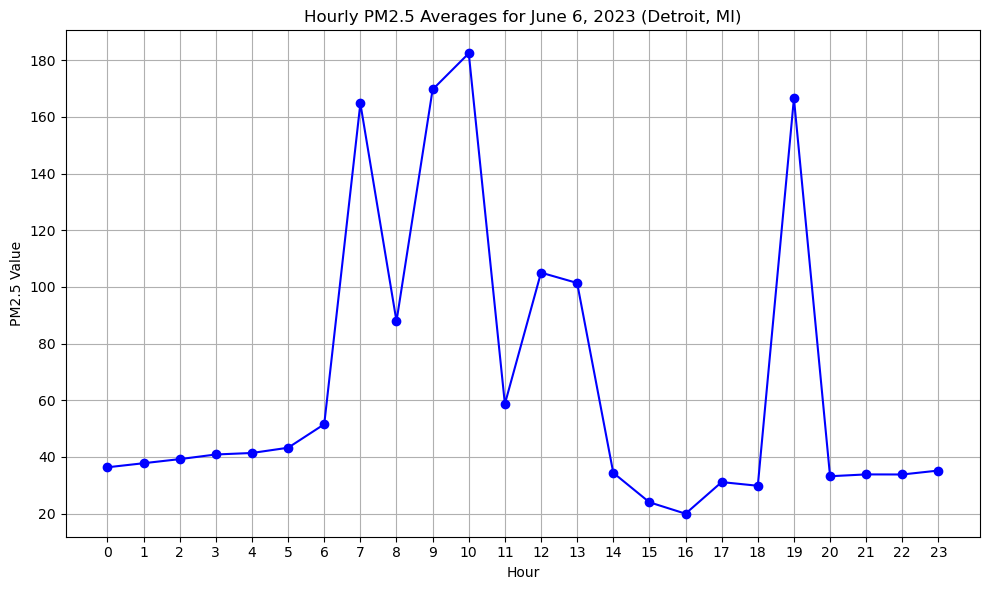

In [5]:
#3.	Plot the hourly averages for the day using line plots. 
#label the plot “Hourly PM2.5 Averages for June 6, 2023(Detroit,MI)”
#the 𝑥-axis should be the hour and 𝑦-axis should be the PM2.5 value 


import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV
data = pd.read_csv("20230606_detroit_downtown_7_5km_aq.csv")

# Convert 'local_time' column to datetime
data['local_time'] = pd.to_datetime(data['local_time'])

# Extract hour from 'local_time'
data['hour'] = data['local_time'].dt.hour

# Calculate hourly averages for PM2.5 values
hourly_avg_pm25 = data.groupby('hour')['value'].mean()

# Plot the hourly averages
plt.figure(figsize=(10, 6))
hourly_avg_pm25.plot(kind='line', marker='o', color='b')
plt.title('Hourly PM2.5 Averages for June 6, 2023 (Detroit, MI)')
plt.xlabel('Hour')
plt.ylabel('PM2.5 Value')
plt.grid(True)
plt.xticks(range(24))
plt.tight_layout()
plt.show()


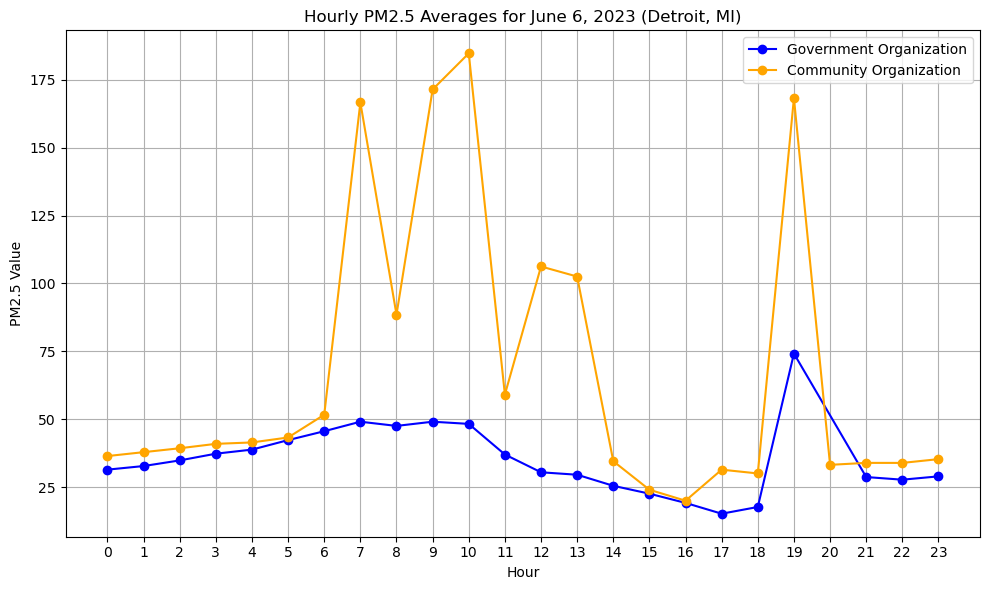

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV
data = pd.read_csv("20230606_detroit_downtown_7_5km_aq.csv")

# Convert 'local_time' column to datetime
data['local_time'] = pd.to_datetime(data['local_time'])

# Extract hour from 'local_time'
data['hour'] = data['local_time'].dt.hour

# Filter data for Government and Community sensors
gov_data = data[data['entity'].str.strip() == 'Governmental Organization']
comm_data = data[data['entity'].str.strip() == 'Community Organization']

# Calculate hourly averages for PM2.5 values for Government and Community sensors
gov_hourly_avg_pm25 = gov_data.groupby('hour')['value'].mean()
comm_hourly_avg_pm25 = comm_data.groupby('hour')['value'].mean()

# Plot the hourly averages for Government and Community sensors on the same plot
plt.figure(figsize=(10, 6))
plt.plot(gov_hourly_avg_pm25.index, gov_hourly_avg_pm25.values, color='blue', marker='o', label='Government Organization')
plt.plot(comm_hourly_avg_pm25.index, comm_hourly_avg_pm25.values, color='orange', marker='o', label='Community Organization')
plt.title('Hourly PM2.5 Averages for June 6, 2023 (Detroit, MI)')
plt.xlabel('Hour')
plt.ylabel('PM2.5 Value')
plt.grid(True)
plt.xticks(range(24))
plt.legend()
plt.tight_layout()
plt.show()


In [52]:
#Build a dataset with 92 datapoints sampled from 100 random draws of data
#from the community sensors: 

import pandas as pd

# Load data from CSV
data = pd.read_csv("20230606_detroit_downtown_7_5km_aq.csv")

# Check if the 'entity' column is present in the DataFrame
if 'entity' not in data.columns:
    print("Error: 'entity' column not found in the DataFrame.")
else:
    # Filter the data for community sensors
    community_data = data[data['entity'] == 'Community Organization']
    
    # Check if any rows are found for community sensors
    if community_data.empty:
        print("Error: No rows found for 'Community Organization' in the 'entity' column.")
    else:
        # Initialize an empty list to store means from each draw
        means_list = []

        # Perform 100 random draws
        for _ in range(100):
            # Sample 95 data points from community_data
            sampled_data = community_data.sample(n=92, random_state=None)  # You can specify a random state for reproducibility
            
             # Compute the mean for each draw and append it to the means_list
            mean_value = sampled_data['value'].mean()
            means_list.append(mean_value)


        # Create a DataFrame containing means from all 100 draws
        means_df = pd.DataFrame(means_list, columns=['mean'])

        # Display the DataFrame
        print(means_df)
# Save sampled data to a CSV file
sampled_data.to_csv("cmtyorgsampled_data.csv", index=False)


          mean
0    70.935870
1    54.119565
2   109.335870
3    74.698913
4    56.307609
..         ...
95   73.433696
96   39.151087
97   38.539130
98   88.767391
99   52.686957

[100 rows x 1 columns]


In [51]:
# What are the descriptive statistics of your sample and the government data?
import pandas as pd

# Load data from CSV
data = pd.read_csv("20230606_detroit_downtown_7_5km_aq.csv")

# Filter the data for community and government sensors
community_data = data[data['entity'] == 'Community Organization']
government_data = data[data['entity'] == 'Governmental Organization']

# Compute descriptive statistics for the sample (community data) and government data
community_stats = community_data['value'].describe()
government_stats = government_data['value'].describe()

# Print the descriptive statistics
print("Descriptive Statistics for Community Data:\n", community_stats)
print("\nDescriptive Statistics for Government Data:\n", government_stats)


Descriptive Statistics for Community Data:
 count    6192.000000
mean       66.554102
std       218.023373
min         6.100000
25%        28.800000
50%        37.100000
75%        44.900000
max      1759.500000
Name: value, dtype: float64

Descriptive Statistics for Government Data:
 count     92.000000
mean      35.372826
std       14.599030
min       14.000000
25%       27.700000
50%       33.300000
75%       43.850000
max      125.000000
Name: value, dtype: float64


In [70]:
###Task: Determine if the sensor means for the day are different, and if that difference is statistically significant.

import pandas as pd
from scipy.stats import normaltest, bartlett, ttest_ind

# Load data from CSV
data = pd.read_csv("20230606_detroit_downtown_7_5km_aq.csv")

# Check if the 'entity' column is present in the DataFrame
if 'entity' not in data.columns:
    print("Error: 'entity' column not found in the DataFrame.")
else:
    # Filter the data for community sensors
    community_data = data[data['entity'] == 'Community Organization']
    
    # Check if any rows are found for community sensors
    if community_data.empty:
        print("Error: No rows found for 'Community Organization' in the 'entity' column.")
    else:
        # Initialize an empty list to store means from each draw
        community_means_list = []

        # Perform 100 random draws for community organization
        for _ in range(100):
            # Sample 95 data points from community_data
            sampled_data = community_data.sample(n=92, replace=True, random_state=None)  # You can specify a random state for reproducibility
            
            # Compute the mean for each draw and append it to the means_list
            mean_value = sampled_data['value'].mean()
            community_means_list.append(mean_value)

        # Create a DataFrame containing means from all 100 draws for community organization
        community_means_df = pd.DataFrame(community_means_list, columns=['mean'])

        # Load governmental organization sample data from the main dataset
        government_data = data[data['entity'] == 'Governmental Organization']

        # Compute normality test for community organization data
        community_norm_pval = normaltest(community_means_df['mean']).pvalue
        print("Normality test p-value for Community Organization data:", community_norm_pval)

        # Check if any rows are found for governmental organization
        if government_data.empty:
            print("Error: No rows found for 'Governmental Organization' in the 'entity' column.")
        else:
            # Compute normality test for governmental organization data
            gov_org_norm_pval = normaltest(government_data['value']).pvalue
            print("Normality test p-value for Governmental Organization data:", gov_org_norm_pval)

            # Perform Bartlett's test for equal variances
            bartlett_pval = bartlett(community_means_df['mean'], government_data['value']).pvalue
            print("Bartlett test p-value for equal variances:", bartlett_pval)

            # Run independent t-test with equal_var parameter based on Bartlett's test result
            equal_var = bartlett_pval > 0.05  # If p-value > 0.05, assume equal variances
            ttest_pval = ttest_ind(community_means_df['mean'], government_data['value'], equal_var=equal_var).pvalue
            print("Independent t-test p-value:", ttest_pval)

            # Save sampled data for governmental organization to a CSV file
            government_data.to_csv("govorgsampled_data.csv", index=False)


Normality test p-value for Community Organization data: 0.027807121201593482
Normality test p-value for Governmental Organization data: 4.8019743658509495e-18
Bartlett test p-value for equal variances: 2.007066663171527e-05
Independent t-test p-value: 1.1323804751443052e-19
